**Diabetes**

In [2]:
# Imports the dataset
import pandas as pd
#https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset?resource=download
# Chargement du jeu de données
Test = pd.read_csv('Testing.csv')
Train = pd.read_csv('Training.csv')


In [4]:
# Concaténer les deux DataFrames
combined_df = pd.concat([Train, Test], ignore_index=True)

# Afficher le DataFrame combiné pour vérifier
print(combined_df)


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763           10      101             76             48      180  32.9   
2764            2      122             70             27        0  36.8   
2765            5      121             72             23      112  26.2   
2766            1      126             60              0        0  30.1   
2767            1       93             70             31        0  30.4   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1    

In [5]:
# Defining X and y
X = combined_df.drop('Outcome',axis=1)
y = combined_df.Outcome

In [6]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
y_train

1584    0
1800    1
2429    0
1706    1
1027    0
       ..
1638    0
1095    1
1130    1
1294    1
860     1
Name: Outcome, Length: 2076, dtype: int64

In [9]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1378,4,122,68,0,0,35.0,0.394,29
839,0,137,40,35,168,43.1,2.288,33
2164,0,131,88,0,0,31.6,0.743,32
2619,0,119,0,0,0,32.4,0.141,24
927,9,165,88,0,0,30.4,0.302,49
...,...,...,...,...,...,...,...,...
361,5,158,70,0,0,29.8,0.207,63
1242,5,73,60,0,0,26.8,0.268,27
2107,1,103,80,11,82,19.4,0.491,22
2357,5,73,60,0,0,26.8,0.268,27


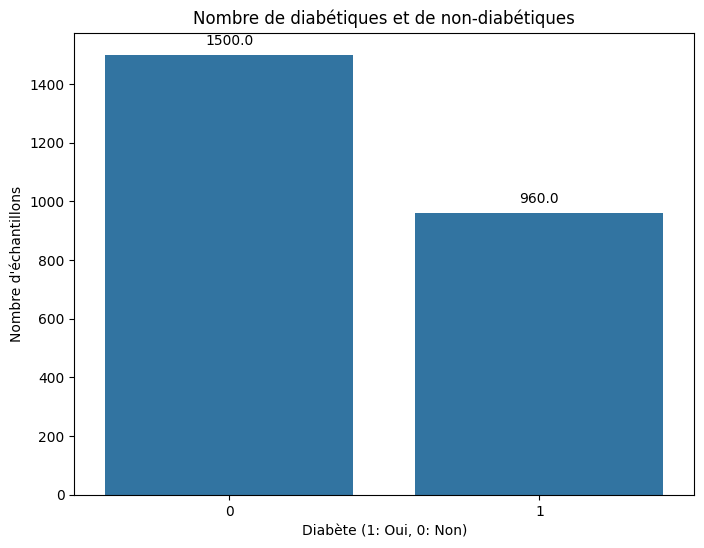

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=Train)

# Affichage des nombres au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Ajout de titre et de légendes
ax.set_title('Nombre de diabétiques et de non-diabétiques')
plt.xlabel('Diabète (1: Oui, 0: Non)')
plt.ylabel("Nombre d'échantillons")

plt.show()



Pourcentage de diabétiques et de non-diabétiques **"Train"**

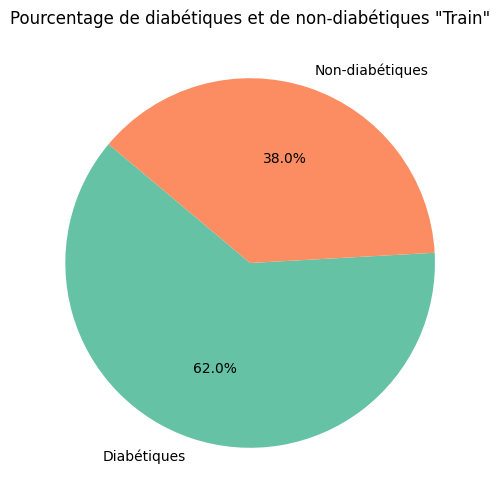

In [17]:
import matplotlib.pyplot as plt

# Calculer les pourcentages de chaque classe 'Diabetes'
total_samples = len(y_train)
diabetes_counts = y_train.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

# Données à représenter
labels = ['Diabétiques', 'Non-diabétiques']
sizes = percentage_diabetes.values

# Création du cercle
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)

# Afficher les pourcentages
plt.title('Pourcentage de diabétiques et de non-diabétiques "Train"')

plt.show()


Pourcentage de diabétiques et de non-diabétiques **"Test"**

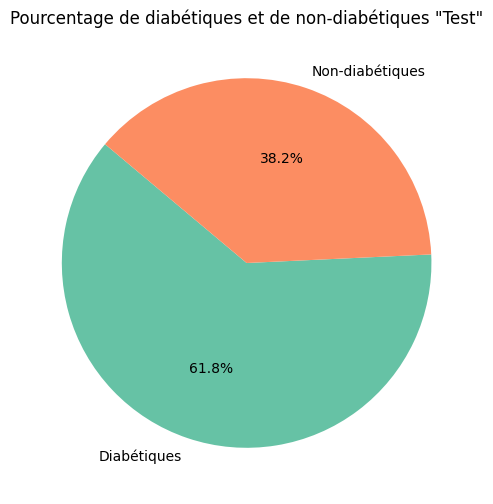

In [20]:
import matplotlib.pyplot as plt

# Calculer les pourcentages de chaque classe 'Diabetes'
total_samples = len(y_test)
diabetes_counts = y_test.value_counts()
percentage_diabetes = (diabetes_counts / total_samples) * 100

# Données à représenter
labels = ['Diabétiques', 'Non-diabétiques']
sizes = percentage_diabetes.values

# Création du cercle
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)

# Afficher les pourcentages
plt.title('Pourcentage de diabétiques et de non-diabétiques "Test"')

plt.show()


K-nearest neighbors (kNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print(clf.score(X_train, y_train))

0.9720616570327553


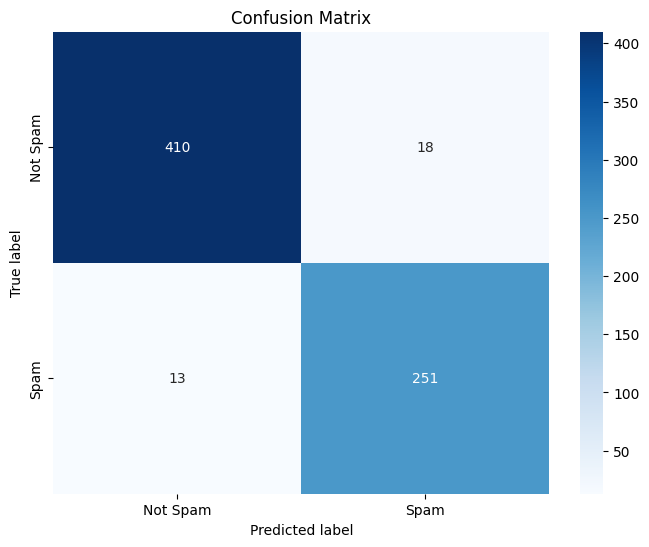

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir les prédictions
y_pred = clf.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['non-diabétiques', 'diabétiques'], yticklabels=['non-diabétiques', 'diabétiques'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Predicting results using Test data set
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
# Calcul de l'accuracy
accuracy = accuracy_score(pred, y_test)

# Affichage de l'accuracy
print("Accuracy:", accuracy*100,"%")

Accuracy: 95.52023121387283 %


In [25]:
from sklearn.model_selection import GridSearchCV     # For parameter optimization

# Sets up the kNN classifier object
knn = KNeighborsClassifier()

# Search parameters
param = range(1, 30, 1)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(knn,{'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid.fit(X_train,y_train).best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

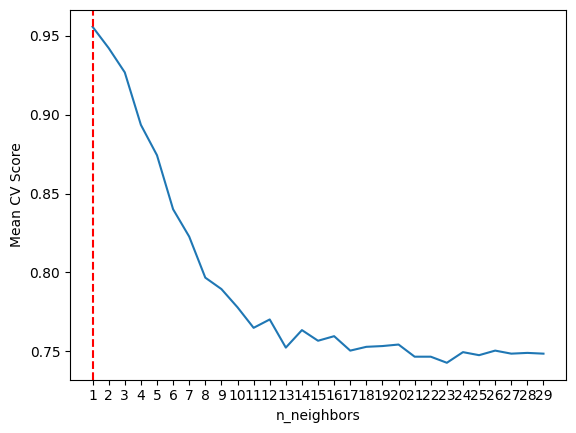

In [26]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(x=best_knn.n_neighbors,color='red', ls='--')

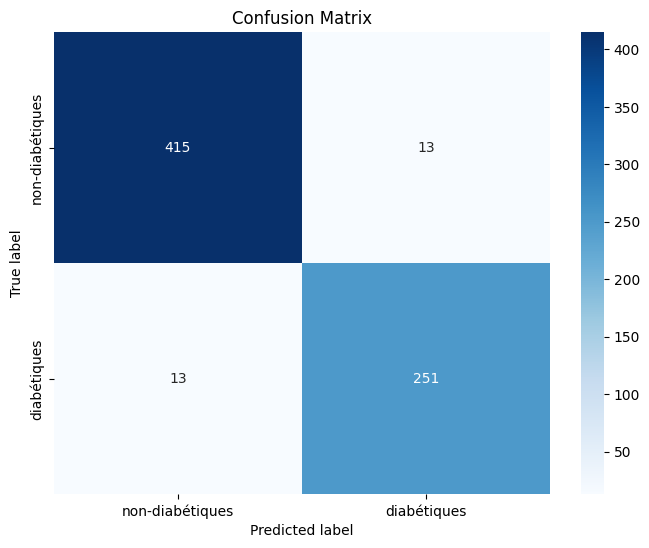

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir les prédictions
y_pred = best_knn.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['non-diabétiques', 'diabétiques'], yticklabels=['non-diabétiques', 'diabétiques'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [28]:

y_pred = best_knn.predict(X_test)
from sklearn.metrics import accuracy_score
# Calcul de l'accuracy
accuracy = accuracy_score(y_pred , y_test)

# Affichage de l'accuracy
print("Accuracy:", accuracy*100,"%")

Accuracy: 96.24277456647398 %


In [29]:
predictions = best_knn.predict(X_test)
print(y_test[30])
print(predictions[1])

0
1


In [30]:
y_test.head(-1)

1378    0
839     1
2164    1
2619    1
927     1
       ..
1918    1
361     0
1242    0
2107    0
2357    0
Name: Outcome, Length: 691, dtype: int64